# Machine Learning 
## final project of  Clustring 
### customers
<div>
In this project, you need to categorize customers into different groups. The dataset provided contains the following features.

 It is recommended to try all clustering algorithms to improve your model.
</div>

<div>


    CustomerID: User identifier

    Gender: User's gender

    Age: User's age

    Annual Income: Annual income

    Spending Score: User score based on behavior
</div>

## Imports 

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy 
import pylab
from scipy.cluster.hierarchy import fcluster

## Data Set 

In [2]:
data = pd.read_csv('customers.csv')
df = pd.DataFrame(data)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = df.drop(columns='CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
encoder = OneHotEncoder(sparse_output=False)  
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df_cluster = pd.concat([gender_df, df.reset_index(drop=True)], axis=1)
df_cluster = df_cluster.drop(columns='Gender',axis=1)
df_cluster

,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.0,19,15,39
1,0.0,1.0,21,15,81
2,1.0,0.0,20,16,6
3,1.0,0.0,23,16,77
4,1.0,0.0,31,17,40
...,...,...,...,...,...
195,1.0,0.0,35,120,79
196,1.0,0.0,45,126,28
197,0.0,1.0,32,126,74
198,0.0,1.0,32,137,18


## Pca and visualization Data

In [6]:
cdf = df_cluster.values
pca = PCA(n_components=2)
cdf = pca.fit_transform(cdf)

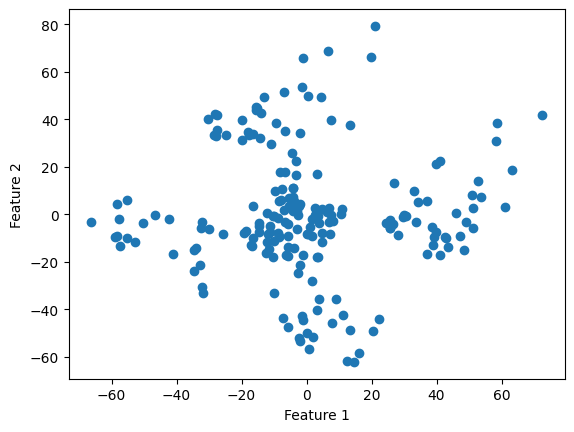

In [7]:
plt.scatter(cdf[:,0],cdf[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## standardization 

In [8]:
scaler = StandardScaler()
cdf  = scaler.fit(cdf).transform(cdf.astype(float))
cdf

array([[-1.20734401e+00, -1.26468591e+00],
       [ 2.90037993e-02, -2.17832863e+00],
       [-2.17484593e+00, -5.03059780e-01],
       [-8.21020218e-02, -2.04946290e+00],
       [-1.21885578e+00, -1.16461578e+00],
       [-8.24216646e-02, -2.00150915e+00],
       [-2.23763877e+00, -3.65820327e-01],
       [ 4.68717690e-01, -2.36137337e+00],
       [-2.51231995e+00, -1.23201852e-01],
       [-2.14210088e-01, -1.81143059e+00],
       [-2.20624251e+00, -3.50062143e-01],
       [ 5.53993029e-01, -2.38013171e+00],
       [-2.08970651e+00, -3.86363251e-01],
       [-6.62896563e-05, -1.92052429e+00],
       [-1.99894074e+00, -4.47648697e-01],
       [ 7.37827552e-02, -1.97442527e+00],
       [-1.30718699e+00, -9.10659376e-01],
       [-2.76710823e-01, -1.66758159e+00],
       [-1.56299042e+00, -6.31307337e-01],
       [ 6.13410345e-01, -2.23421935e+00],
       [-1.24031590e+00, -8.17598350e-01],
       [-3.71668773e-02, -1.70349511e+00],
       [-2.19007808e+00, -7.17630475e-02],
       [-5.

## k - means Model

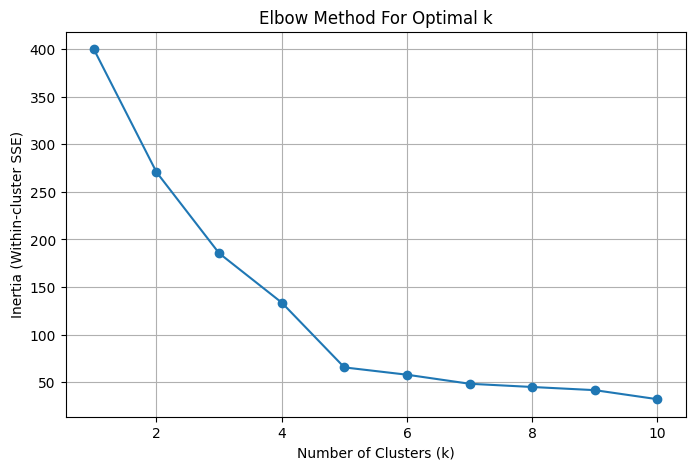

In [9]:
inertia = []
K = range(1, 11)

for k in K:
    k_means_ = KMeans(n_clusters=k, random_state=7 )
    k_means_.fit(cdf)
    inertia.append(k_means_.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [10]:
best_k = 4
k_means = KMeans(init='k-means++',n_clusters=best_k,n_init=12)


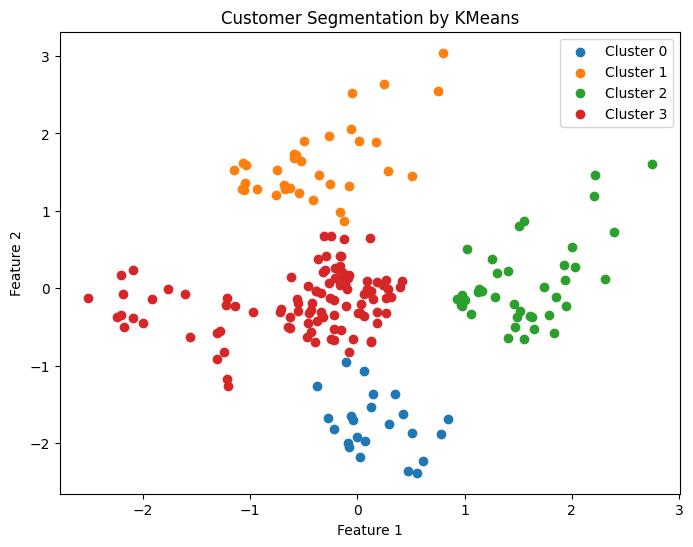

In [11]:
clusters = k_means.fit_predict(cdf)
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_points = cdf[clusters == cluster]  
    plt.scatter(
        cluster_points[:, 0],  
        cluster_points[:, 1], 
        label=f'Cluster {cluster}'
    )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Segmentation by KMeans')
plt.legend()
plt.show()

## Agglomerative 

In [12]:
dist_matrix = euclidean_distances(cdf,cdf) 
dist_matrix

array([[0.        , 1.53730248, 1.23131407, ..., 4.38203834, 4.74924693,
        4.88240991],
       [1.53730248, 0.        , 2.768299  , ..., 4.25377447, 5.27614062,
        4.6549265 ],
       [1.23131407, 2.768299  , 0.        , ..., 4.81450359, 4.62442913,
        5.35104889],
       ...,
       [4.38203834, 4.25377447, 4.81450359, ..., 0.        , 2.12017533,
        0.54406439],
       [4.74924693, 5.27614062, 4.62442913, ..., 2.12017533, 0.        ,
        2.42369346],
       [4.88240991, 4.6549265 , 5.35104889, ..., 0.54406439, 2.42369346,
        0.        ]])

In [13]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

max_d = 4
clusters = fcluster(Z_using_dist_matrix, max_d, criterion='distance')
clusters

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4344\1740120496.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


array([29, 19, 25, 19, 29, 19, 25, 17, 26, 21, 25, 17, 25, 19, 25, 19, 30,
       21, 30, 17, 30, 21, 24, 21, 28, 20, 30, 23, 30, 18, 24, 22, 24, 18,
       28, 20, 28, 22, 27, 22, 27, 18, 27, 32, 27, 32, 36, 36, 35, 35, 36,
       32, 36, 36, 35, 35, 36, 35, 36, 35, 36, 31, 34, 36, 34, 31, 33, 34,
       31, 33, 33, 34, 34, 33, 34, 40, 33, 33, 40, 34, 33, 40, 39, 34, 40,
       34, 40, 40, 40, 37, 37, 37, 37, 38, 37, 40, 37, 41, 38, 41, 37, 37,
       41, 41, 41, 37, 38, 38, 38, 38, 37, 41, 38, 41, 41, 41, 38, 41, 38,
       41, 41, 38, 41, 14, 43,  8, 43, 14, 51,  8, 51,  8, 43,  8, 51, 14,
       51,  8, 48,  8, 50, 14, 43, 14, 48, 15, 42, 10, 48, 14, 48, 14, 48,
       10, 48, 14, 50, 10, 50, 10, 42, 14, 49, 15, 47,  9, 47, 16, 47, 11,
       49,  9, 49, 16, 49, 16, 49,  9, 45, 13, 44, 13, 45, 13, 44,  5, 46,
       12, 46, 13, 46, 12,  1,  6,  1,  4,  2,  4,  3,  7], dtype=int32)

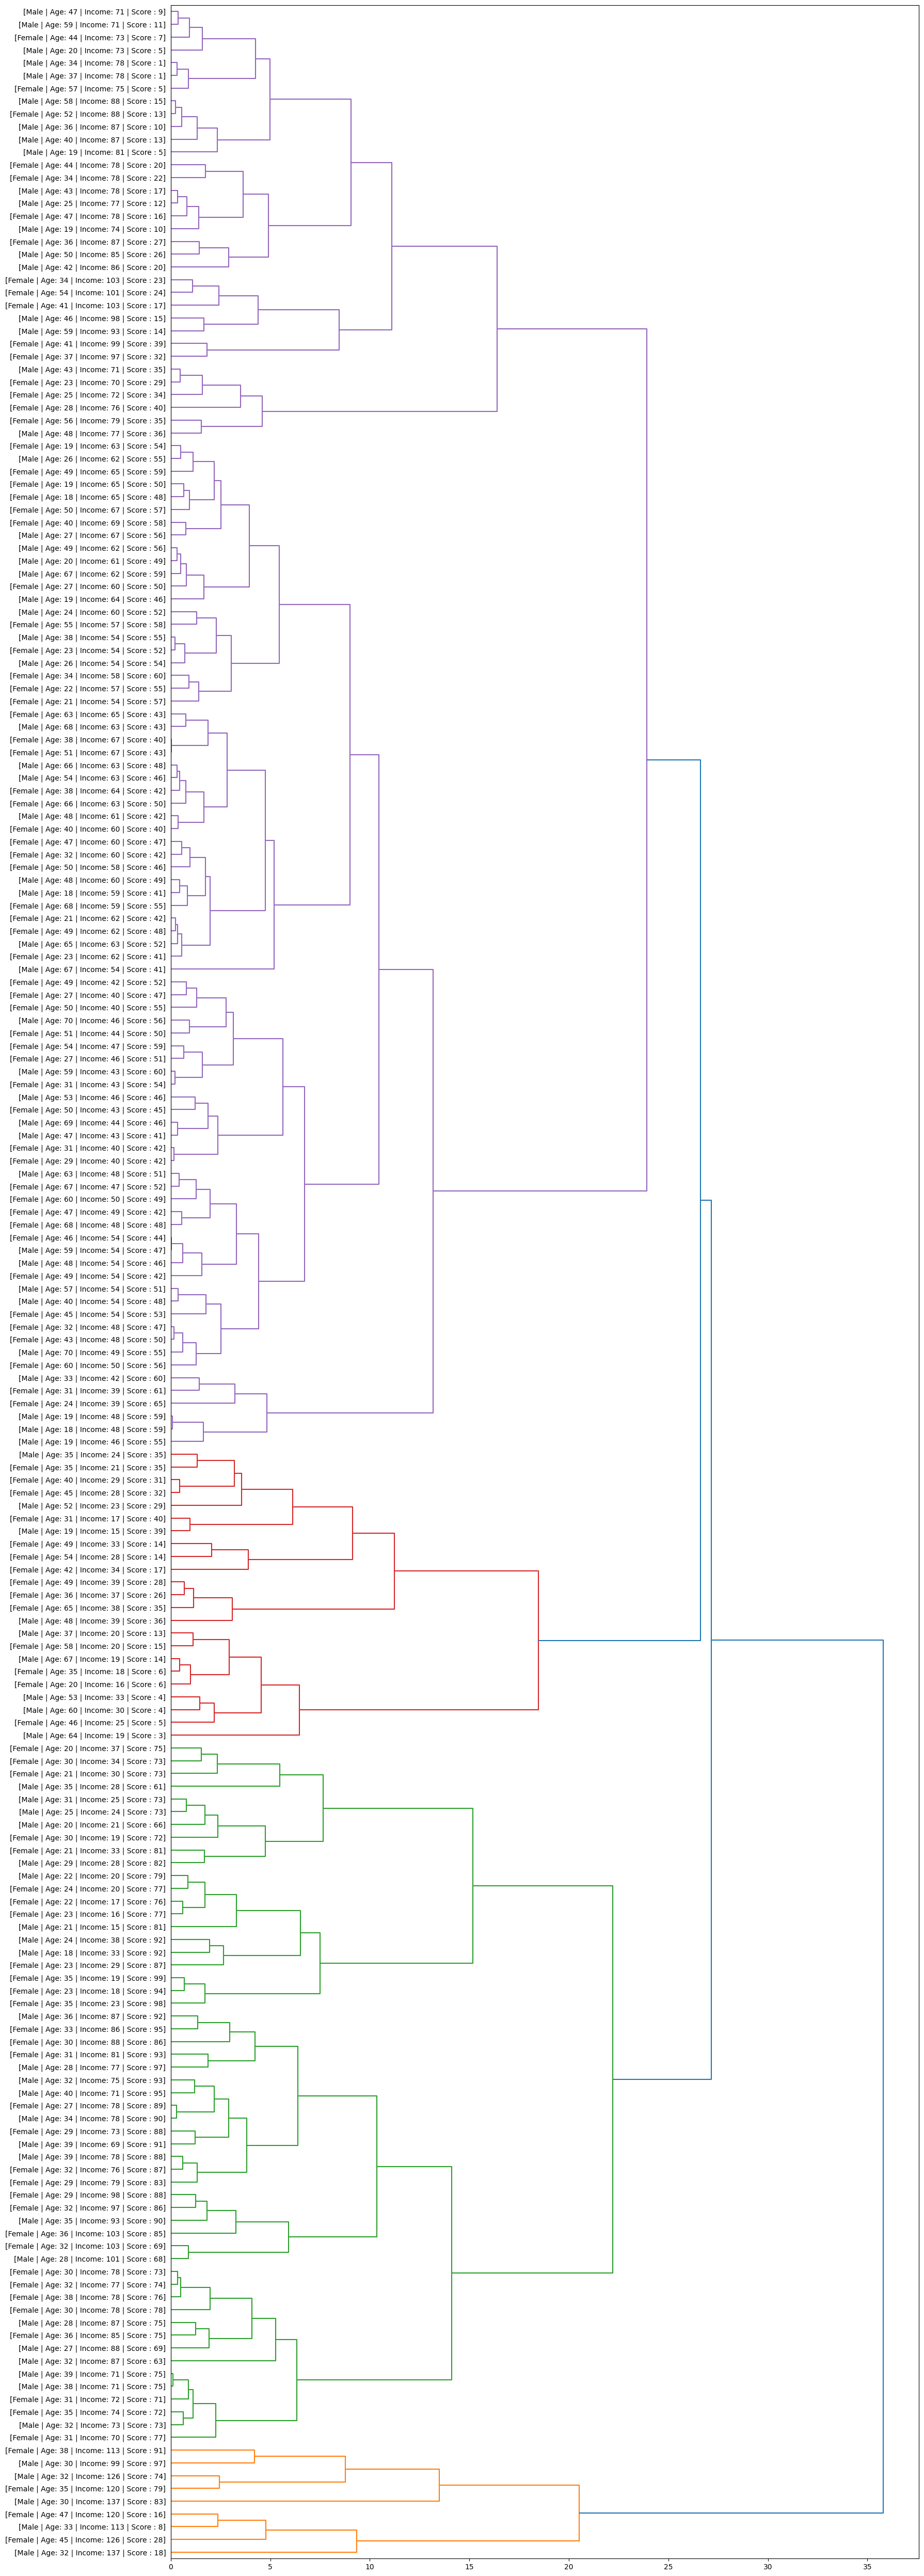

In [14]:
def llf(id):
    row = df.iloc[id]
    return f"[{row['Gender']} | Age: {row['Age']} | Income: {row['Annual Income (k$)']} | Score : {row['Spending Score (1-100)']}]"


fig = pylab.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(
    Z_using_dist_matrix,
    leaf_label_func=llf,
    leaf_rotation=0,
    leaf_font_size=10,
    orientation='right'
)
plt.tight_layout()
plt.show()

## DBSCN

In [15]:
db = DBSCAN(eps=0.5 , min_samples=10).fit(cdf)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_
df_cluster["Clus_Db"]=db_labels
realClusterNum=len(set(db_labels)) - (1 if -1 in db_labels else 0)
clusterNum = len(set(db_labels))


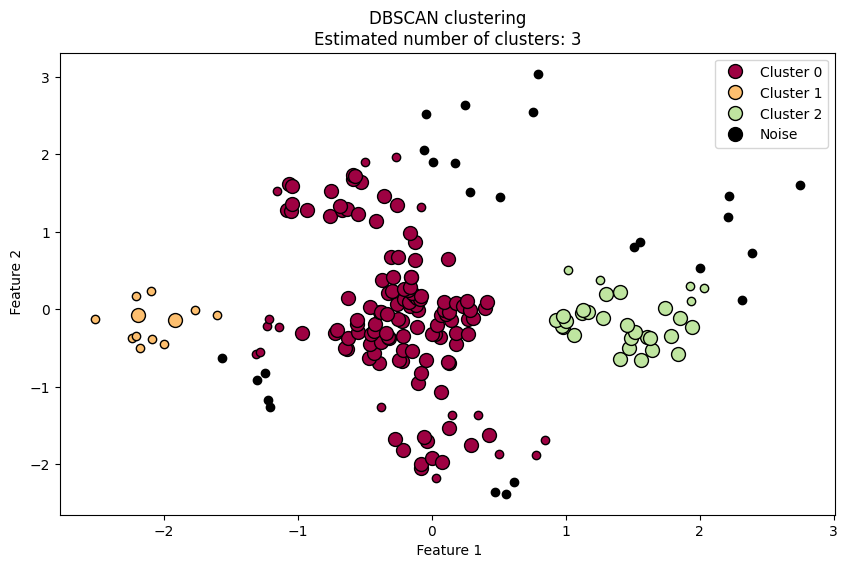

In [17]:
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db_labels == k)

    xy = cdf[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f"Cluster {k}" if k != -1 else "Noise")

    xy = cdf[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN clustering\nEstimated number of clusters: {realClusterNum}')
plt.xlabel(' Feature 1')
plt.ylabel(' Feature 2')
plt.legend()
plt.show()